In [22]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torch.utils.tensorboard import SummaryWriter

import utils

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

val_size = 10000
train_size = len(mnist_train) - val_size

train_data, val_data = random_split(mnist_train, [train_size, val_size])

BATCH_SIZE = 200
SHUFFLE = False

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
test_loader = DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=SHUFFLE)


In [23]:
writer = SummaryWriter("runs/MNIST")

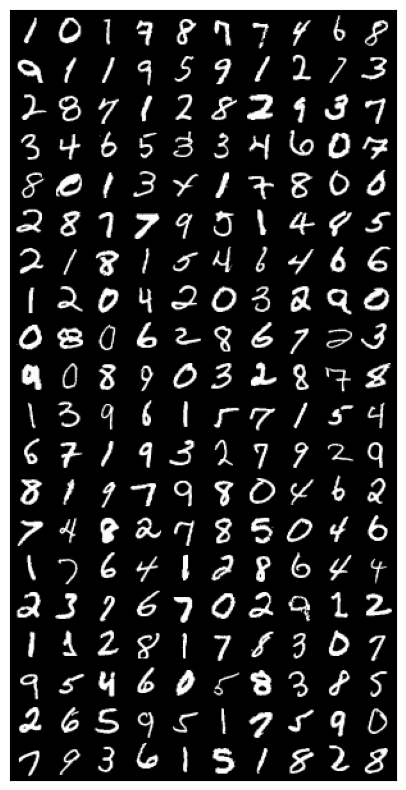

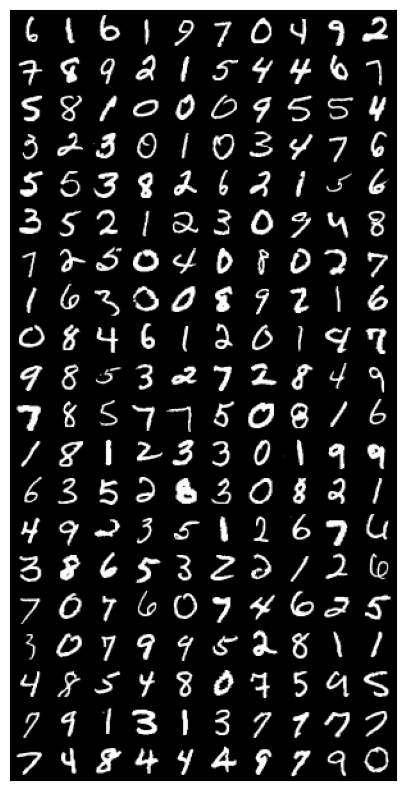

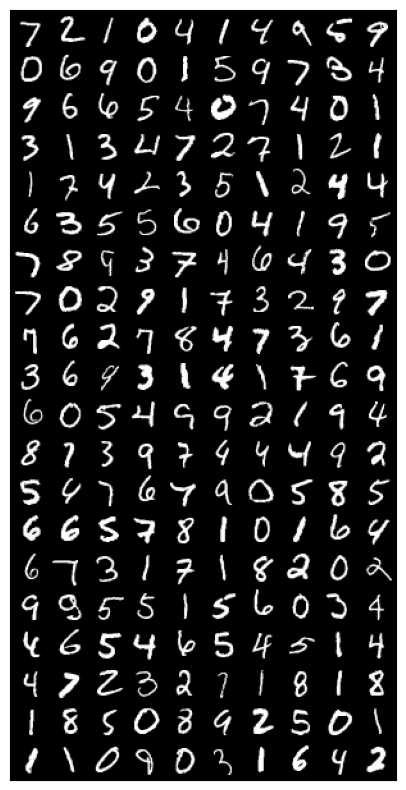

In [24]:
def show_batch(dl): 
    for images,lables in dl: 
        fig, ax = plt.subplots(figsize = (10,10))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,10).permute(1,2,0))
        break
    
# show a batch
show_batch(train_loader)
show_batch(val_loader)
show_batch(test_loader)

In [25]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")



tensor([1.], device='mps:0')


In [26]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.do1 = nn.Dropout(0.3)
        self.fc1 = nn.Linear(1600, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool1 = nn.MaxPool2d(2,2)
        self.pool2 = nn.MaxPool2d(2,2)
        self.ReLU = nn.ReLU()



    def forward(self, x):
        #mps_device = torch.device("mps")
        #x = x.to(mps_device)
        x = self.conv1(x)
        x = self.ReLU(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.ReLU(x)
        x = self.pool2(x)
        x = x.flatten(1)
        x = self.do1(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

Epoch 0, training loss: 0.0022397411027550696, validation loss: 0.000615215128287673
Train accuracy = 0.86192
Validation accuracy = 0.9634
Epoch 5, training loss: 0.0008666527988016605, validation loss: 0.0004981489028781653
Train accuracy = 0.94632
Validation accuracy = 0.9701
Epoch 10, training loss: 0.0007295876481384039, validation loss: 0.0003674607045948505
Train accuracy = 0.9543
Validation accuracy = 0.9766
Epoch 15, training loss: 0.000659242623820901, validation loss: 0.00036022510696202516
Train accuracy = 0.95924
Validation accuracy = 0.9777
Epoch 20, training loss: 0.0006173537023365498, validation loss: 0.00037546653635799884
Train accuracy = 0.96112
Validation accuracy = 0.976
Epoch 25, training loss: 0.0006300045777112245, validation loss: 0.0003811443803831935
Train accuracy = 0.96074
Validation accuracy = 0.9756


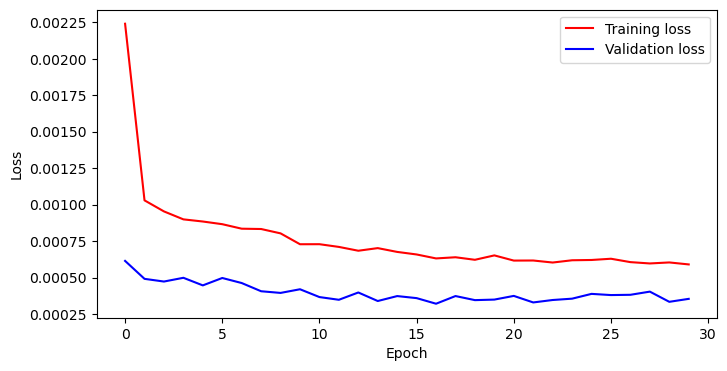

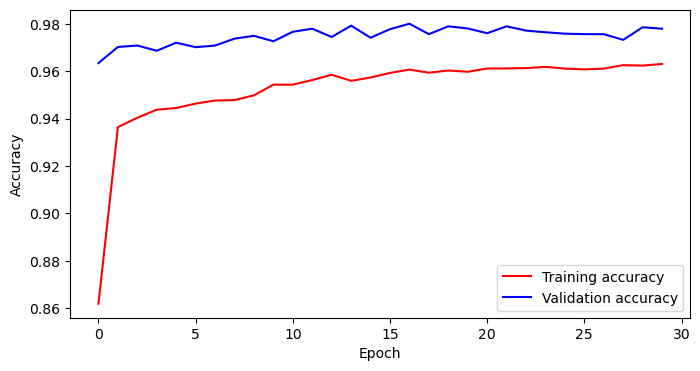

lowest loss for validation set: 0.00032188922259956596, with an accuracy of 0.98
Test accuracy is 98.0%.


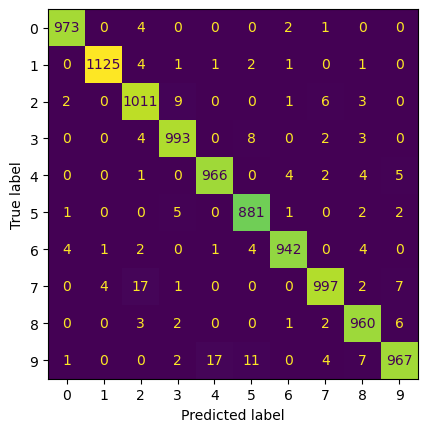

In [27]:
LEARNING_RATE = 0.01
epochs = 30
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
utils.train_model(model, criterion, optimizer, train_loader, val_loader, 'best_model_mnist.pt',writer, epochs, device)
model = torch.load('best_model_mnist.pt')
model.to(device)
utils.test_model(model, test_loader, device)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data2/test_32x32.mat
Epoch 0, training loss: 0.01789793455840124, validation loss: 0.013004456996917725
Train accuracy = 0.18697150449091438
Validation accuracy = 0.171
Epoch 5, training loss: 0.011812978046418872, validation loss: 0.011191554784774781
Train accuracy = 0.14597893629682937
Validation accuracy = 0.172
Epoch 10, training loss: 0.011805185203325762, validation loss: 0.01119289755821228
Train accuracy = 0.14859459983115822
Validation accuracy = 0.172
Epoch 15, training loss: 0.011800361774760865, validation loss: 0.011193455696105957
Train accuracy = 0.1497571169575266
Validation accuracy = 0.172
Epoch 20, training loss: 0.011813420874688044, validation loss: 0.011191918134689331
Train accuracy = 0.14775039096558118
Validation accuracy = 0.172
Epoch 25, training loss: 0.011815942590750113, validation loss: 0.011192827939987183
Train accuracy = 0.147169132402397
Validation accura

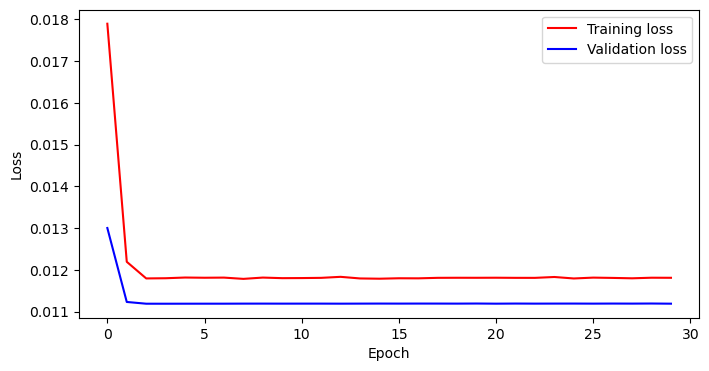

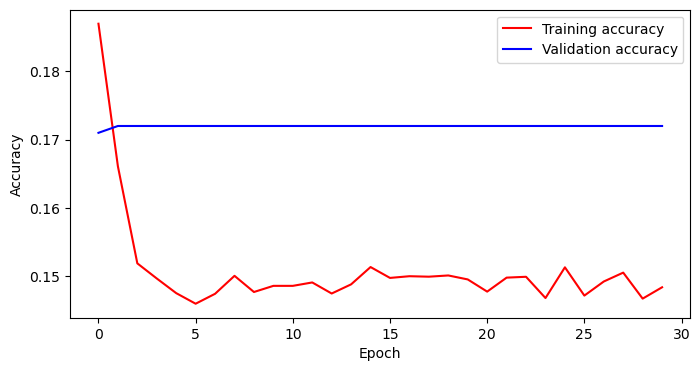

lowest loss for validation set: 0.01119066333770752, with an accuracy of 0.172
Test accuracy is 20.0%.


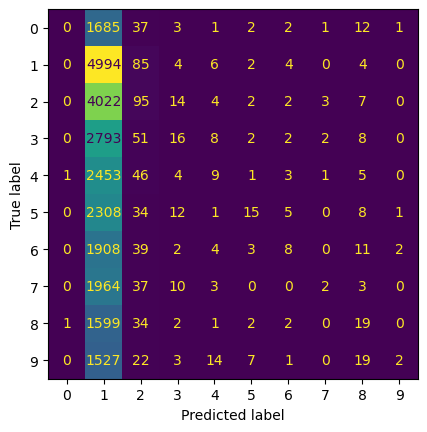

In [28]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(28),
    transforms.ToTensor()
])

svhn_train = datasets.SVHN(root='./data', split="train", download=True, transform=transform)
svhn_test = datasets.SVHN(root='./data2', split="test", download=True, transform=transform)

val_size = 1000
train_size = len(svhn_train) - val_size

train_data, val_data = random_split(svhn_train, [train_size, val_size])

train_svhn_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
val_svhn_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
svhn_test_loader = DataLoader(svhn_test, batch_size=BATCH_SIZE, shuffle=SHUFFLE)

model = torch.load('best_model_mnist.pt')

for i, param in enumerate(model.parameters()):
    if i < 7:
        param.requires_grad = False
        
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
utils.train_model(model, criterion, optimizer, train_svhn_loader, val_svhn_loader,'best_model_svhn.pt', writer, epochs, device)
model = torch.load('best_model_svhn.pt')
model.to(device)
utils.test_model(model, svhn_test_loader)
